## Analyse exploratoire d'un jeu de données
### 1• Comprendre de quoi parle les données et ce que l'on cherche à faire

Les données concernent les détails de clients d'une banque avec une var. target binaire représentant si le client à quitté la banque où si le client est toujours là.

Notre objectif ? Pouvoir prédire si un client quittera la banque ou non
### 2• Identifier le nom de chaque colonnes et les comprendre
- RowNumber
- CustomerId
- Surname (= nom de famille du client)
- CreditScore (le crédit du client)
- Geography (le pays du client)
- Gender
- Age
- Tenure (depuis combien d'année le client est dans la banque)
- Balance (ce que le client possède en banque)
- NumOfProduct (nombre de produits que le client utilise)
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited

### 3• Répertoire de librairies et data-set utilisés

Cette partie est à compléter au fur et à mesure de l'avancée du code.


In [1]:
#Importer les librairies et les données
# Analyse Générale
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler #normalisation
from sklearn.preprocessing import LabelEncoder #Catégorique->numérique
from sklearn.ensemble import IsolationForest #identification des valeurs abberantes

#Modèle
from sklearn.model_selection import train_test_split

#Data-set
df = pd.read_csv('data/Churn_modelling.csv')

### 4• Observer la qualité des données

##### *A. Convertir les données catégoriques en numérique - preprocessing*

In [2]:
df_filt = pd.get_dummies(df, columns=['Geography', 'Gender'])
df_base = df.drop(columns= ['RowNumber','CustomerId','Surname','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])
df_filt = pd.concat([df_filt,df_base],axis=1)
print(df_filt)


      RowNumber  CustomerId    Surname  CreditScore  Age  Tenure    Balance  \
0             1    15634602   Hargrave          619   42       2       0.00   
1             2    15647311       Hill          608   41       1   83807.86   
2             3    15619304       Onio          502   42       8  159660.80   
3             4    15701354       Boni          699   39       1       0.00   
4             5    15737888   Mitchell          850   43       2  125510.82   
...         ...         ...        ...          ...  ...     ...        ...   
9995       9996    15606229   Obijiaku          771   39       5       0.00   
9996       9997    15569892  Johnstone          516   35      10   57369.61   
9997       9998    15584532        Liu          709   36       7       0.00   
9998       9999    15682355  Sabbatini          772   42       3   75075.31   
9999      10000    15628319     Walker          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  Est

##### *B. Manque t il des valeurs ?*

In [3]:
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Réponse : Non

##### *C. Retirer les colonnes inutiles*

In [4]:
# retirer les colonnes inutiles : rownumber, surname et CustomerId
df_filt = df_filt.drop(columns=['RowNumber','CustomerId','Surname'])

##### *D. Il y a t'il des valeurs aberrantes ?*
Afin de savoir si il y a des valeurs aberrantes il existe plusieurs méthodes d'identification d'outliers (=valeurs aberrantes). Celle que j'ai choisi d'utiliser est l'isolation Forest.

**1. Identification des outliers**

In [5]:
df_filt_NoGG = df_filt.drop(columns=['Geography','Gender'])
#Initialisation du modèle d'isolation Forest
iso_forest = IsolationForest(contamination=0.05)

#Ajusterle modèle sur les données
df_filt_NoGG['Outlier'] = iso_forest.fit_predict(df_filt_NoGG)

#Identifier les outliers
outliers_iforest = df_filt_NoGG[df_filt_NoGG['Outlier'] ==-1]
print("lignes hors norme :\n",outliers_iforest)

lignes hors norme :
       CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2             502   42       8  159660.80              3          1   
7             376   29       4  115046.74              4          1   
43            834   49       2  131394.56              1          0   
58            511   66       4       0.00              1          1   
70            738   58       2  133745.44              4          1   
...           ...  ...     ...        ...            ...        ...   
9747          610   69       5   86038.21              3          0   
9768          714   54       4  137986.58              2          0   
9800          762   35       3  119349.69              3          1   
9908          492   45       9  170295.04              2          0   
9920          678   49       3  204510.94              1          0   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
2                  0        113931.57       1              

**2. Elimination des outliers identifiés**

In [6]:
df_no_outliers = df_filt_NoGG[df_filt_NoGG['Outlier'] == 1].drop(columns=['Outlier'])
print(df_no_outliers)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
5             645   44       8  113755.78              2          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1              True   
1            

### 5•Réaliser des statistiques descriptives globales

##### *A. Analyse générale*

In [7]:
stat = df_no_outliers.describe()
stat_filt = stat.drop(['count'])
print(stat_filt)

      CreditScore        Age     Tenure        Balance  NumOfProducts  \
mean   649.254211  38.479053   5.007895   75298.381744       1.503368   
std     94.683638  10.124412   2.868241   62006.785635       0.531846   
min    350.000000  18.000000   0.000000       0.000000       1.000000   
25%    584.000000  32.000000   3.000000       0.000000       1.000000   
50%    651.000000  37.000000   5.000000   96270.620000       1.000000   
75%    715.000000  43.000000   7.000000  126742.780000       2.000000   
max    850.000000  92.000000  10.000000  221532.800000       4.000000   

      HasCrCard  IsActiveMember  EstimatedSalary    Exited  
mean    0.72400        0.516316    100323.065324  0.170105  
std     0.44704        0.499760     57036.995132  0.375745  
min     0.00000        0.000000        11.580000  0.000000  
25%     0.00000        0.000000     52042.317500  0.000000  
50%     1.00000        1.000000    100272.165000  0.000000  
75%     1.00000        1.000000    148980.577500 

*B. Histogrammes générales*

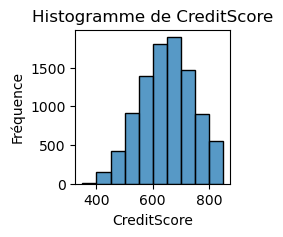

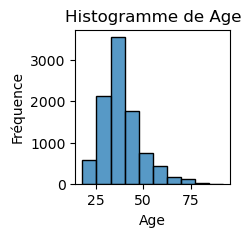

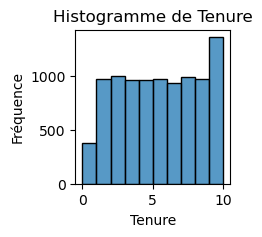

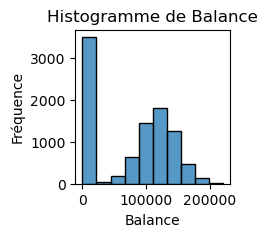

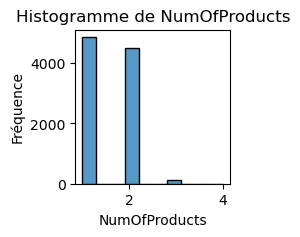

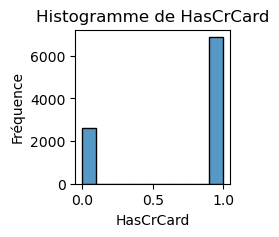

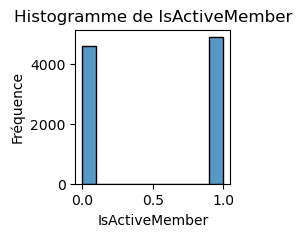

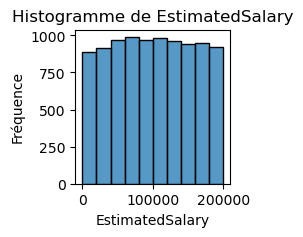

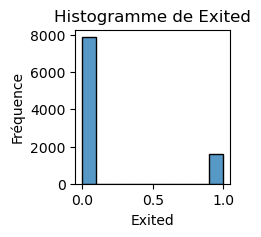

In [8]:
df_Num = df_no_outliers.drop(columns=['Gender_Female','Gender_Male','Geography_Spain','Geography_France','Geography_Germany'])

#fig, axes = plt.subplots(3,3,figsize = (12,12))

for col in df_Num.columns:
    plt.figure(figsize=(2,2))
    sns.histplot(df_Num[col], bins=10, kde=False)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

*C.  Quelques Camembert de répartition*

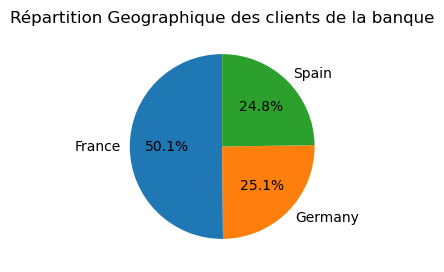

In [9]:
#Répartition géographique
counts_Geo = df['Geography'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(counts_Geo, labels=counts_Geo.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition Geographique des clients de la banque')
plt.show()

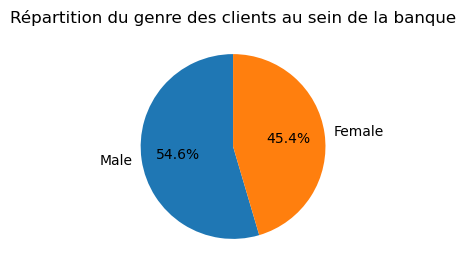

In [10]:
#Répartition des genres
counts_Gender = df['Gender'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(counts_Gender, labels=counts_Gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition du genre des clients au sein de la banque')
plt.show()

*D. Analyse de corrélation*

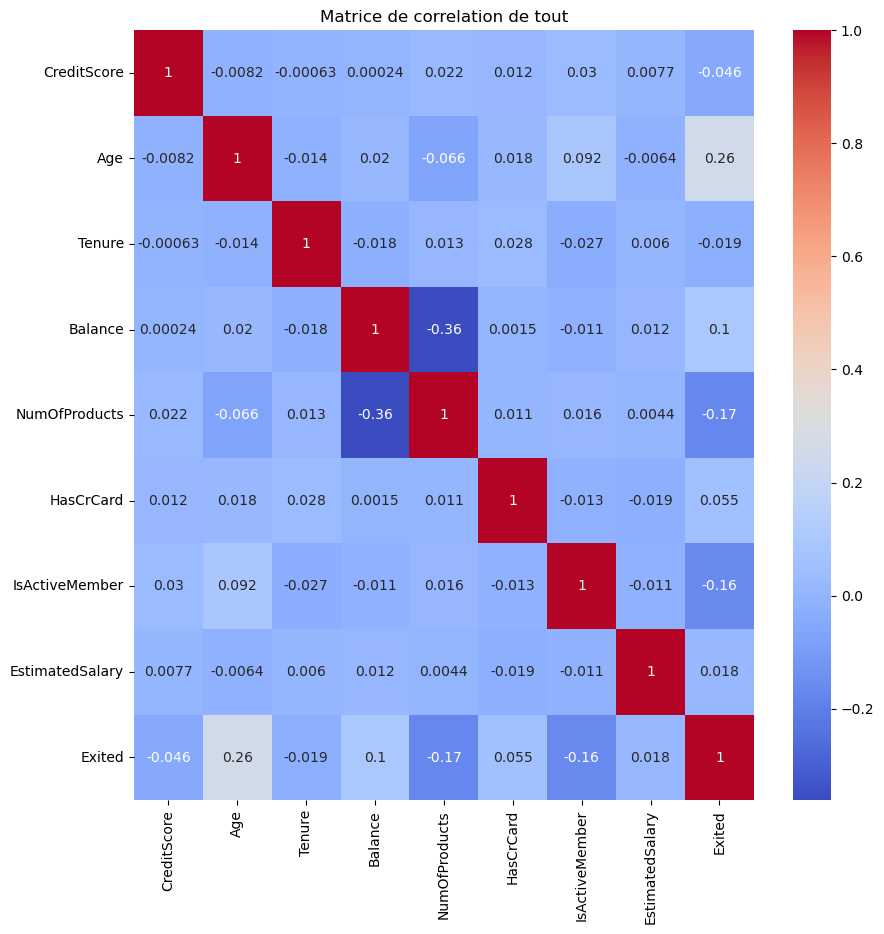

In [11]:
df_corr= df_no_outliers.drop(columns=['Gender_Female','Gender_Male','Geography_Spain','Geography_France','Geography_Germany'])
Corr_matr_all = df_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_matr_all,annot=True,cmap='coolwarm')
plt.title('Matrice de correlation de tout')
plt.show()

On observe une relation entre l'age est le fait de quitter la banque

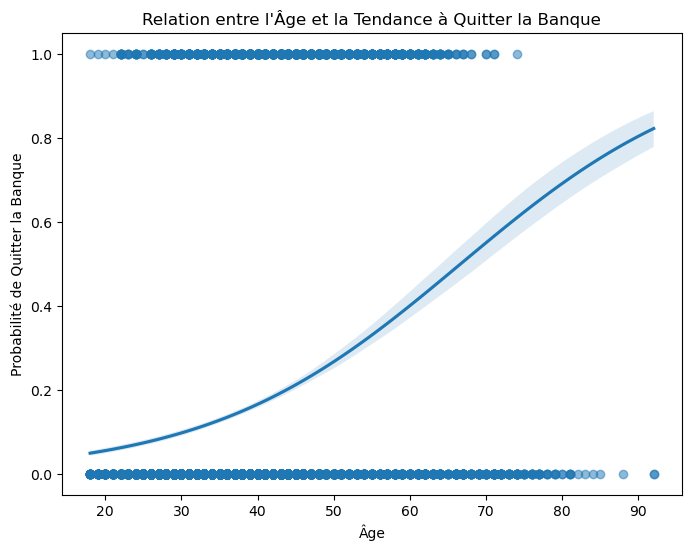

In [12]:
# Créer le nuage de points avec la régression
plt.figure(figsize=(8, 6))
sns.regplot(data=df_no_outliers, x='Age', y='Exited', logistic=True, scatter_kws={'alpha':0.5})

# Titre et labels
plt.title("Relation entre l'Âge et la Tendance à Quitter la Banque")
plt.xlabel("Âge")
plt.ylabel("Probabilité de Quitter la Banque")
plt.show()

### 6• Faire un résumé

### 7• choisir un modèle ML pour répondre à notre question

**A. Choisir son modèle**

Je vais commencer par le decision tree

**B. Normaliser les données si besoin**

Je le fais pour l'avoir mais pas besoin

In [13]:
#initialisation du Scaler
scaler=StandardScaler()

# Normalisation
df_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

#Vérification
print(df_normalized)

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0       -0.319546  0.347786 -1.048745 -1.214421      -0.946504   0.617426   
1       -0.435729  0.249010 -1.397409  0.137242      -0.946504  -1.619626   
2        0.525417  0.051457 -1.397409 -1.214421       0.933837  -1.619626   
3        2.120286  0.446563 -1.048745  0.809832      -0.946504   0.617426   
4       -0.044933  0.545339  1.043240  0.620245       0.933837   0.617426   
...           ...       ...       ...       ...            ...        ...   
9495     1.285884  0.051457 -0.002753 -1.214421       0.933837   0.617426   
9496    -1.407437 -0.343648  1.740568 -0.289157      -0.946504   0.617426   
9497     0.631038 -0.244872  0.694576 -1.214421      -0.946504  -1.619626   
9498     1.296446  0.347786 -0.700081 -0.003598       0.933837   0.617426   
9499     1.507687 -1.035083 -0.351417  0.884537      -0.946504   0.617426   

      IsActiveMember  EstimatedSalary    Exited  Geography_France  \
0     

**C. Préparer les données à l'entrainement**

In [58]:


# Séparer les caractéristiques (X) et la cible (y)
X = df_no_outliers.drop('Exited', axis=1)
y = df_no_outliers['Exited']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


**D. Entraîner le modèle**

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Créer l'instance du modèle
clf = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**E. Evaluer le modèle**

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Faire des prédictions
y_pred = clf.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({
    'Données': X_test.reset_index(drop=True).apply(lambda row: row.to_list(), axis=1),
    'Prédiction': y_pred,
    'Vérité': y_test.values
})

# Afficher les résultats ligne par ligne
print(results)

Précision : 0.81
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       802
           1       0.42      0.50      0.46       148

    accuracy                           0.81       950
   macro avg       0.66      0.69      0.67       950
weighted avg       0.83      0.81      0.82       950

Matrice de confusion :
[[699 103]
 [ 74  74]]
                                               Données  Prédiction  Vérité
0    [444, 45, 6, 0.0, 1, 1, 0, 130009.85, True, Fa...           0       1
1    [617, 46, 3, 106521.49, 1, 0, 1, 86587.37, Fal...           0       0
2    [683, 32, 0, 138171.1, 2, 1, 1, 188203.58, Fal...           0       0
3    [414, 38, 8, 0.0, 1, 0, 1, 77661.12, True, Fal...           0       1
4    [696, 36, 3, 0.0, 3, 1, 0, 65039.9, False, Fal...           0       0
..                                                 ...         ...     ...
945  [670, 43, 1, 97792.21, 1, 0, 0, 120225.62, Fal...   

## Test d'autres modèles

**RANDOM FOREST**

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le modèle
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Évaluer le modèle
y_pred_rf = rf_clf.predict(X_test)
print(f"Précision (Random Forest) : {accuracy_score(y_test, y_pred_rf):.2f}")

Précision (Random Forest) : 0.88


**GRADIENT BOOSTING**

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Créer et entraîner le modèle
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Évaluer le modèle
y_pred_gb = gb_clf.predict(X_test)
print(f"Précision (Gradient Boosting) : {accuracy_score(y_test, y_pred_gb):.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

#print ligne par ligne
results_gb=pd.DataFrame({
    'Réel':y_test,
    'Prédiction':y_pred_gb
})
print(results_gb)


Précision (Gradient Boosting) : 0.91
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       802
           1       0.42      0.50      0.46       148

    accuracy                           0.81       950
   macro avg       0.66      0.69      0.67       950
weighted avg       0.83      0.81      0.82       950

Matrice de confusion :
[[699 103]
 [ 74  74]]
      Réel  Prédiction
1008     1           1
6959     0           0
4443     0           0
2689     1           0
4764     0           0
...    ...         ...
7521     0           0
534      0           0
6192     0           0
1655     0           1
9618     0           0

[950 rows x 2 columns]


SVM

In [63]:
from sklearn.svm import SVC

# Créer et entraîner le modèle
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)

# Évaluer le modèle
y_pred_svc = svc_clf.predict(X_test)
print(f"Précision (SVM) : {accuracy_score(y_test, y_pred_svc):.2f}")

Précision (SVM) : 0.84


Kneighbors

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Créer et entraîner le modèle
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Évaluer le modèle
y_pred_knn = knn_clf.predict(X_test)
print(f"Précision (k-NN) : {accuracy_score(y_test, y_pred_knn):.2f}")



Précision (k-NN) : 0.82


---

AJUSTER PARAMETRE RANDOM FOREST

In [65]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Créer un modèle Random Forest avec les paramètres par défaut
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Évaluer le modèle sur le jeu de test
y_pred = rf.predict(X_test)
print(f"Précision avec paramètres par défaut : {accuracy_score(y_test, y_pred):.2f}")



Précision avec paramètres par défaut : 0.88


In [66]:
# Test avec différents nombres d'arbres
for n in [100, 300, 1000]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Précision avec n_estimators={n} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec n_estimators=100 : 0.88
Précision avec n_estimators=300 : 0.88
Précision avec n_estimators=1000 : 0.88


In [67]:
# Test avec différentes profondeurs maximales
for depth in [None, 10, 20, 30, 100]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Précision avec max_depth={depth} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec max_depth=None : 0.88
Précision avec max_depth=10 : 0.89
Précision avec max_depth=20 : 0.88
Précision avec max_depth=30 : 0.88
Précision avec max_depth=100 : 0.88


In [68]:
# Test avec différents nombres minimum d'échantillons pour diviser un noeud
for min_samples in [2, 5, 10, 50]:
    rf = RandomForestClassifier(min_samples_split=min_samples, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"Précision avec min_samples_split={min_samples} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec min_samples_split=2 : 0.88
Précision avec min_samples_split=5 : 0.89
Précision avec min_samples_split=10 : 0.89
Précision avec min_samples_split=50 : 0.89


---

## Gradient boosting

rem : pca pour savoir quel colonne on peut virer

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Créer un modèle Gradient Boosting avec les paramètres par défaut
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Évaluer le modèle sur le jeu de test
y_pred = gb.predict(X_test)
print(f"Précision avec paramètres par défaut : {accuracy_score(y_test, y_pred):.2f}")


Précision avec paramètres par défaut : 0.91


In [70]:
# Test avec différents nombres d'estimateurs
for n in [50, 100, 150, 200]:
    gb = GradientBoostingClassifier(n_estimators=n, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print(f"Précision avec n_estimators={n} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec n_estimators=50 : 0.89
Précision avec n_estimators=100 : 0.91
Précision avec n_estimators=150 : 0.90
Précision avec n_estimators=200 : 0.90
Précision avec n_estimators=500 : 0.90
Précision avec n_estimators=1000 : 0.89


In [71]:
# Test avec différentes profondeurs maximales
for depth in [3,4,5,6]:
    gb = GradientBoostingClassifier(max_depth=depth, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print(f"Précision avec max_depth={depth} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec max_depth=3 : 0.91
Précision avec max_depth=4 : 0.90
Précision avec max_depth=5 : 0.89
Précision avec max_depth=6 : 0.89


In [72]:
# Test avec différents taux d'apprentissage
for rate in [0.01, 0.05, 0.1]:
    gb = GradientBoostingClassifier(learning_rate=rate, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print(f"Précision avec learning_rate={rate} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec learning_rate=0.01 : 0.86
Précision avec learning_rate=0.05 : 0.89
Précision avec learning_rate=0.1 : 0.91
Précision avec learning_rate=0.2 : 0.90
Précision avec learning_rate=0.5 : 0.89


In [73]:
# Test avec différents nombres minimum d'échantillons pour diviser un noeud
for min_samples in [2, 5, 10,50]:
    gb = GradientBoostingClassifier(min_samples_split=min_samples, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print(f"Précision avec min_samples_split={min_samples} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec min_samples_split=2 : 0.91
Précision avec min_samples_split=5 : 0.90
Précision avec min_samples_split=10 : 0.90
Précision avec min_samples_split=50 : 0.90


In [74]:
# Test avec différents nombres minimum d'échantillons pour être une feuille
for min_samples in [1, 2, 4,10]:
    gb = GradientBoostingClassifier(min_samples_leaf=min_samples, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print(f"Précision avec min_samples_leaf={min_samples} : {accuracy_score(y_test, y_pred):.2f}")


Précision avec min_samples_leaf=1 : 0.91
Précision avec min_samples_leaf=2 : 0.90
Précision avec min_samples_leaf=4 : 0.91
Précision avec min_samples_leaf=10 : 0.90


---

J'ai donc au final choisis le modèle gradient boosting

La prochaine étape est de faire une appliweb pour qu'un utilisateur entre les données et qu'une prédiction de départ d'affiche en réponse.

---

## Sauvegarder mon modèle entrainé

In [75]:
import joblib
joblib.dump(gb_clf,'model.pkl')

['model.pkl']